In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [33]:
#get population data
population = pd.read_csv("../input/population.csv")
population.columns = ["date", "uk_population", "ireland_population","france_population",]
population[["france_population", "ireland_population", "uk_population"]] = population[["france_population", "ireland_population", "uk_population"]] / 1000000
population["Year"] = [int(x[:4]) for x in population.date]

In [62]:

df = pd.read_csv("../input/UK/domestic.csv").dropna()
coastal = df[(df["Route"]=="Domestic: Coastwise") & (df["Direction"]=="All")].drop(columns=["Route","Direction"])
dom = df[(df["Route"]=="Total") & (df["Direction"]=="All")].drop(columns=["Route","Direction"])
int = df[(df["Route"]=="International") & (df["Direction"]=="All")].drop(columns=["Route","Direction"])
df = pd.DataFrame({"International":int.iloc[0],"Total":dom.iloc[0],"Coastal":coastal.iloc[0],"Year":[x[:4]for x in coastal.columns]})
df["Year"] = df["Year"].astype("float")
df[["International","Total","Coastal"]] = df[["International","Total","Coastal"]]*1000
df = df.merge(population, on="Year",how="left")
df["total_perc"] = df["Total"]/df["uk_population"]
df["int_perc"] = df["International"]/df["uk_population"]
df["coastal_perc"] = df["Coastal"]/df["uk_population"]


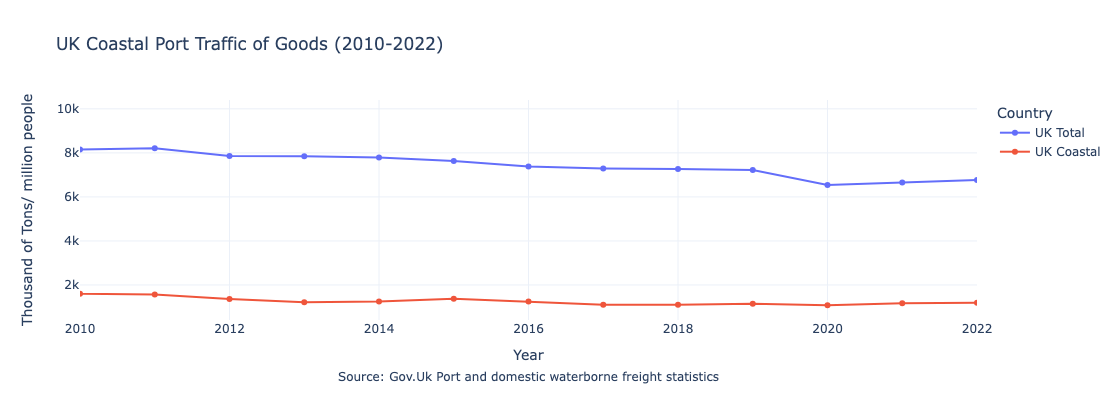

In [71]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df["Year"], y=df["total_perc"], mode='lines+markers', name='UK Total'))
fig.add_trace(go.Scatter(x=df["Year"], y=df["coastal_perc"], mode='lines+markers', name='UK Coastal'))


fig.update_layout(
    title='UK Coastal Port Traffic of Goods (2010-2022)',
    xaxis_title='Year',
    yaxis_title='Thousand of Tons/ million people',
    legend_title='Country',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(range=[2010, 2022]), 
    width=500,  
    height=400  
)

fig.add_annotation(
    text="Source: <a href='https://www.gov.uk/government/statistical-data-sets/port-and-domestic-waterborne-freight-statistics-port'>Gov.Uk Port and domestic waterborne freight statistics</a>",
    xref="paper", yref="paper",
    x=0.5, y=-0.3,
    showarrow=False,
    font=dict(size=12),
    xanchor='center'
)


fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)



fig.show()

fig.write_image("../output/UK Coastal Port Traffic of Goods (2010-2022).png")